In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pathlib
from glob import glob
from PIL import Image
import numpy as np

In [5]:
print(os.pardir)

..


In [10]:
PRJ_ROOT = pathlib.Path(os.getcwd()).parent
DATA_PATH = os.path.join(
    PRJ_ROOT, 'data', 'rice_leaf_diseases'
)

# EDA

In [11]:
# example data
classes = os.listdir(DATA_PATH)
print(f'There is {len(classes)} classes include {classes}')

There is 3 classes include ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


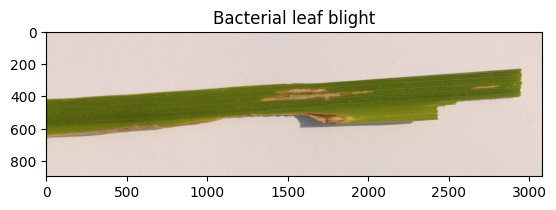

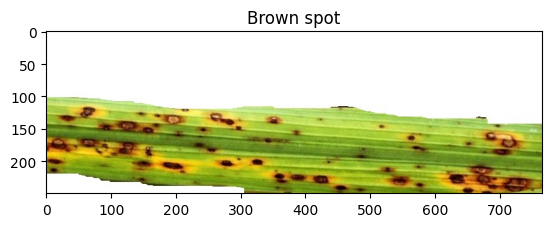

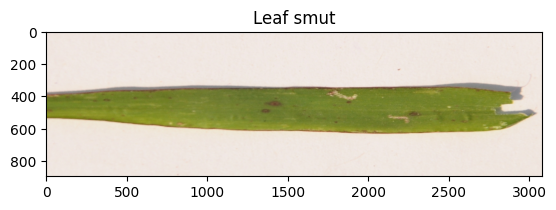

In [17]:
# show example images for each classes
for cls in classes:
    images = glob(os.path.join(DATA_PATH, cls, "*"))
    img = Image.open(images[0])
    print(f'Class: {cls} has {len(images)} images')
    plt.imshow(np.asarray(img))
    plt.title(cls)
    plt.show()

In [19]:
for cls in classes:
    images = glob(os.path.join(DATA_PATH, cls, "*"))
    print(f'Class: {cls} has {len(images)} images')

Class: Bacterial leaf blight has 40 images
Class: Brown spot has 40 images
Class: Leaf smut has 40 images


# train-test-split

Class: Bacterial leaf blight has 32 images


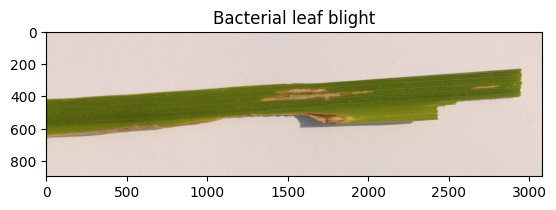

Class: Brown spot has 32 images


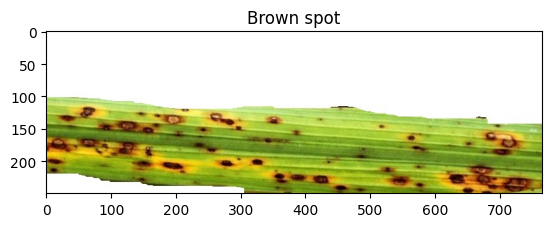

Class: Leaf smut has 32 images


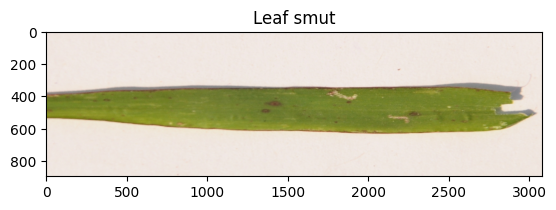

In [20]:
from sklearn.model_selection import train_test_split
import shutil

# split data into train and test
for cls in classes:
    images = glob(os.path.join(DATA_PATH, cls, "*"))
    train, test = train_test_split(images, test_size=0.2, random_state=42)

    # create train folder
    train_path = os.path.join(DATA_PATH, 'train', cls)
    pathlib.Path(train_path).mkdir(parents=True, exist_ok=True)

    # create test folder
    test_path = os.path.join(DATA_PATH, 'test', cls)
    pathlib.Path(test_path).mkdir(parents=True, exist_ok=True)

    # move train images
    for img in train:
        shutil.move(img, train_path)

    # move test images
    for img in test:
        shutil.move(img, test_path)

# show example images for each classes
for cls in classes:
    images = glob(os.path.join(DATA_PATH, 'train', cls, "*"))
    img = Image.open(images[0])
    print(f'Class: {cls} has {len(images)} images')
    plt.imshow(np.asarray(img))
    plt.title(cls)
    plt.show()